In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

In [ ]:
DATA_DIR = "./mit_data"

anon_dcgm_df = pd.read_csv(f'{DATA_DIR}/dcgm.csv')
user_df = pd.read_csv(f'{DATA_DIR}/scheduler_data.csv')

In [10]:
unique_job_count = len(user_df['id_job'].unique())
print(f"Number of unique job IDs: {unique_job_count}")

Number of unique job IDs: 287069


### Exploratory Data Analysis

In [5]:
anon_dcgm_df.shape, user_df.shape

((96893, 23), (287173, 31))

Text(0.5, 1.0, 'NaN Percentage')

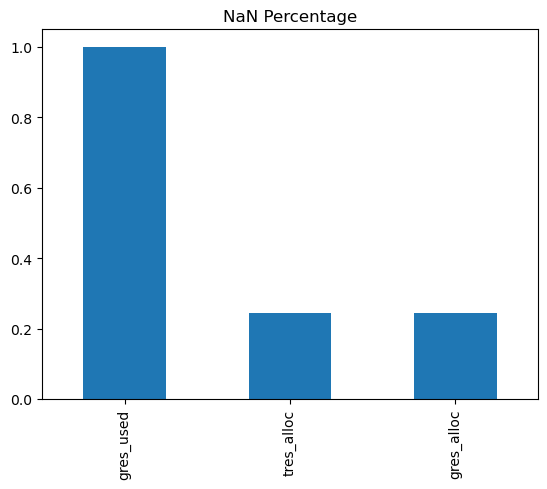

In [6]:
user_df.isna().mean(0).sort_values(ascending=False).iloc[:3] \
    .plot(kind='bar') \
    .set_title('NaN Percentage')

In [7]:
anon_dcgm_df.drop(['id_job', 'gpu_id'], axis=1).describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
maxgpumemoryused_bytes,96893.000000,7169811677.755875,10481709508.148819,0.000000,0.000000,2106589184.000000,7762608128.000000,34083962880.000000
energyconsumed_joules,96893.000000,98732.099491,168706.020958,0.000000,1828.000000,10234.000000,133714.000000,868934.000000
totalexecutiontime_sec,96893.000000,22069.848436,99984.702801,0.080000,15.620000,201.040000,5596.680000,2895390.000000
pcierxbandwidth_megabytes_max,96893.000000,1102.159712,738.590877,0.000000,393.000000,1092.000000,1809.000000,2147.000000
pcietxbandwidth_megabytes_max,96893.000000,957.035235,714.644379,0.000000,266.000000,884.000000,1583.000000,2147.000000
pcietxbandwidth_megabytes_min,96893.000000,792.028155,669.515853,0.000000,102.000000,708.000000,1357.000000,2147.000000
pcierxbandwidth_megabytes_min,96893.000000,744.184967,664.887109,0.000000,119.000000,561.000000,1308.000000,2147.000000
pcietxbandwidth_megabytes_avg,96893.000000,874.355733,650.611060,0.000000,248.000000,837.000000,1410.000000,2147.000000
pcierxbandwidth_megabytes_avg,96893.000000,922.292240,609.972447,0.000000,369.000000,948.000000,1393.000000,2147.000000
powerusage_watts_max,96893.000000,115.754833,92.750007,0.000000,27.503000,66.502000,222.825000,337.630000


In [8]:
user_df_categorical_cols = ['id_job', 'id_user', 'gres_used', 'id_array_task', 'id_array_job', 'kill_requid', 'exit_code', 'flags', 'state',
                           'array_task_pending', 'derived_ec', 'cpus_req', 'priority']
user_df.drop(user_df_categorical_cols, axis=1).describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
mem_req,287173.000000,3579146135058055168.000000,4494616743192418816.000000,0.000000,10240.000000,16384.000000,9223372036854784000.000000,9223372036854792192.000000
timelimit,287173.000000,935706978.815801,1772918023.290309,1.000000,240.000000,240.000000,30240.000000,4294967295.000000
time_eligible,287173.000000,12575678.196679,18721932.414521,-1.000000,7821740.000000,8980747.000000,22157253.000000,2715808008.000000
time_start,287173.000000,11967427.251994,9936119.438365,-1.000000,2282590.000000,8692316.000000,21980772.000000,32001780.000000
time_end,287173.000000,14189311.601007,8043992.010570,-1.000000,8077730.000000,8988625.000000,22160270.000000,32001404.000000
time_submit,287173.000000,14199594.298562,8039657.230700,3014.000000,8074972.000000,8989192.000000,22157251.000000,32001779.000000
nodes_alloc,287173.000000,1.476584,12.745401,0.000000,1.000000,1.000000,1.000000,435.000000
array_max_tasks,287173.000000,0.003204,0.151014,0.000000,0.000000,0.000000,0.000000,8.000000
track_steps,287173.000000,0.001598,0.039947,0.000000,0.000000,0.000000,0.000000,1.000000
time_suspended,287173.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
